In [1]:
import torch
from torchvision.datasets import ImageFolder, DatasetFolder
from torch.utils.data import Subset
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
from transforms import TransformLoader

In [2]:
import logging

In [3]:
import sys
logger = logging.getLogger()

In [4]:
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.WARNING)

In [5]:
logger.handlers[0].stream = sys.stdout

In [6]:
mini_all_base_classes_dataset = ImageFolder(
    root='../meta-analysis-classification/data/miniImagenet-base/train',
    transform=TransformLoader(image_size=84).get_composed_transform(dataset_name='mini', aug=False),
    target_transform=None,)
mini_all_novel_classes_dataset = ImageFolder(
    root='../meta-analysis-classification/data/miniImagenet-base/test',
    transform=TransformLoader(image_size=84).get_composed_transform(dataset_name='mini', aug=False),
    target_transform=None,)

In [7]:
base_example_class_label = torch.load(open('base_example_class_label.pkl', 'rb'))
novel_example_class_label = torch.load(open('novel_example_class_label.pkl', 'rb'))

In [8]:
# start = time.time()
# base_example_class_label = [
#     mini_all_base_classes_dataset[i][1] for i in range(len(mini_all_base_classes_dataset))
# ]
# end = time.time()

In [9]:
# start = time.time()
# novel_example_class_label = [
#     mini_all_novel_classes_dataset[i][1] for i in range(len(mini_all_novel_classes_dataset))
# ]
# end = time.time()

In [10]:
Counter(base_example_class_label)

Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600,
         10: 600,
         11: 600,
         12: 600,
         13: 600,
         14: 600,
         15: 600,
         16: 600,
         17: 600,
         18: 600,
         19: 600,
         20: 600,
         21: 600,
         22: 600,
         23: 600,
         24: 600,
         25: 600,
         26: 600,
         27: 600,
         28: 600,
         29: 600,
         30: 600,
         31: 600,
         32: 600,
         33: 600,
         34: 600,
         35: 600,
         36: 600,
         37: 600,
         38: 600,
         39: 600,
         40: 600,
         41: 600,
         42: 600,
         43: 600,
         44: 600,
         45: 600,
         46: 600,
         47: 600,
         48: 600,
         49: 600,
         50: 600,
         51: 600,
         52: 600,
         53: 600,
         54: 600,
         55: 600,
  

In [11]:
mini_all_base_classes_dataset.class_to_idx

{'n01532829': 0,
 'n01558993': 1,
 'n01704323': 2,
 'n01749939': 3,
 'n01770081': 4,
 'n01843383': 5,
 'n01910747': 6,
 'n02074367': 7,
 'n02089867': 8,
 'n02091831': 9,
 'n02101006': 10,
 'n02105505': 11,
 'n02108089': 12,
 'n02108551': 13,
 'n02108915': 14,
 'n02111277': 15,
 'n02113712': 16,
 'n02120079': 17,
 'n02165456': 18,
 'n02457408': 19,
 'n02606052': 20,
 'n02687172': 21,
 'n02747177': 22,
 'n02795169': 23,
 'n02823428': 24,
 'n02966193': 25,
 'n03017168': 26,
 'n03047690': 27,
 'n03062245': 28,
 'n03207743': 29,
 'n03220513': 30,
 'n03337140': 31,
 'n03347037': 32,
 'n03400231': 33,
 'n03476684': 34,
 'n03527444': 35,
 'n03676483': 36,
 'n03838899': 37,
 'n03854065': 38,
 'n03888605': 39,
 'n03908618': 40,
 'n03924679': 41,
 'n03998194': 42,
 'n04067472': 43,
 'n04243546': 44,
 'n04251144': 45,
 'n04258138': 46,
 'n04275548': 47,
 'n04296562': 48,
 'n04389033': 49,
 'n04435653': 50,
 'n04443257': 51,
 'n04509417': 52,
 'n04515003': 53,
 'n04596742': 54,
 'n04604644': 55,
 '

In [12]:
mini_all_novel_classes_dataset.class_to_idx

{'n01930112': 0,
 'n01981276': 1,
 'n02099601': 2,
 'n02110063': 3,
 'n02110341': 4,
 'n02116738': 5,
 'n02129165': 6,
 'n02219486': 7,
 'n02443484': 8,
 'n02871525': 9,
 'n03127925': 10,
 'n03146219': 11,
 'n03272010': 12,
 'n03544143': 13,
 'n03775546': 14,
 'n04146614': 15,
 'n04149813': 16,
 'n04418357': 17,
 'n04522168': 18,
 'n07613480': 19}

In [13]:
idx_to_base_class = {a[1]: a[0] for a in mini_all_base_classes_dataset.class_to_idx.items()}
idx_to_novel_class = {a[1]: a[0] for a in mini_all_novel_classes_dataset.class_to_idx.items()}

In [14]:
idx_to_novel_class

{0: 'n01930112',
 1: 'n01981276',
 2: 'n02099601',
 3: 'n02110063',
 4: 'n02110341',
 5: 'n02116738',
 6: 'n02129165',
 7: 'n02219486',
 8: 'n02443484',
 9: 'n02871525',
 10: 'n03127925',
 11: 'n03146219',
 12: 'n03272010',
 13: 'n03544143',
 14: 'n03775546',
 15: 'n04146614',
 16: 'n04149813',
 17: 'n04418357',
 18: 'n04522168',
 19: 'n07613480'}

In [15]:
class Subset_with_label_remap(torch.utils.data.Subset):
    def __init__(self, dataset, indices, label_remap_dictionary):
        super().__init__(dataset=dataset, indices=indices)
        self.label_remap_dictionary = label_remap_dictionary
    def __getitem__(self, i):
        x, y = super().__getitem__(i)
        return x, self.label_remap_dictionary[y]

In [16]:
def n_way_dataset(all_classes_dataset, example_class_label, n_class_list):
    chosen_indices = [i for i in range(len(example_class_label)) if example_class_label[i] in set(n_class_list)]
    return Subset_with_label_remap(
        dataset=all_classes_dataset,
        indices=chosen_indices,
        label_remap_dictionary={x[1]: x[0] for x in enumerate(random.sample(n_class_list, len(n_class_list)))} # shuffle the labels
    )

In [17]:
# classes_chosen = [7,10,29,35,59]
classes_chosen = [0, 4, 6, 13, 19]

In [18]:
d1 = n_way_dataset(
    all_classes_dataset=mini_all_novel_classes_dataset,
    example_class_label=novel_example_class_label,
    n_class_list=classes_chosen)

In [19]:
[idx_to_novel_class[cl] for cl in classes_chosen]

['n01930112', 'n02110341', 'n02129165', 'n03544143', 'n07613480']

In [20]:
len(d1)

3000

In [21]:
def chw2hwc(img):
    return np.transpose(a=img, axes=(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


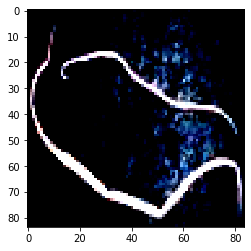

1




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


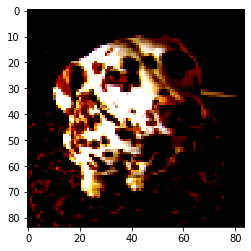

4




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


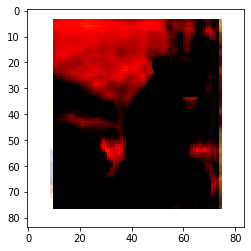

3




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


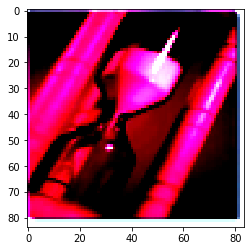

2




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


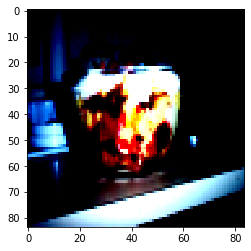

0






In [22]:
example_idx = [300, 900, 1500, 2100, 2700]
for idx in example_idx:
    plt.imshow(chw2hwc(np.asarray(d1[idx][0])))
    plt.show()
    print(d1[idx][1])
    print('\n'*3)

In [23]:
n_way = 5

from models import get_model
from task2vec import Task2Vec

base_task_class_tuples = [
    tuple(sorted(np.random.choice(np.unique(base_example_class_label), size=n_way, replace=False, p=None)))
        for _ in range(100)
]

base_embedding_dict = {}
for i, cl_tuple in enumerate(base_task_class_tuples):
    # get model
    probe_network = get_model(
                    model_name='resnet34',
                    pretrained=True,
                    num_classes=n_way)
    probe_network = probe_network.to('cuda:0')
    # create Task2Vec object
    t2v = Task2Vec(
        model=probe_network,
        skip_layers=0, # starting from which layer is gradient computed for 
        max_samples=None, # number of samples to fit the last layer
        classifier_opts={
            'optimizer': 'adam',
            'epochs': 100,
            'learning_rate': 0.002,
            'weight_decay': 0.000
            },
        method='montecarlo',
        method_opts=None,
        loader_opts=None,
        bernoulli=False)
    # create new dataset based on cl_tuple 
    dataset = n_way_dataset(
        all_classes_dataset=mini_all_base_classes_dataset,
        example_class_label=base_example_class_label,
        n_class_list=list(cl_tuple)
    )
    # compute and save Rmbedding object
    base_embedding_dict[cl_tuple] = t2v.embed(dataset=dataset)
    print(f"Done with task {i+1}")

with open('base_embedding_dict.pkl', 'wb') as f:
    torch.save(base_embedding_dict, f)

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/asetlur/.local/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Done with task 1


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Done with task 2


Widget Javascript not detected.  It may not be installed or enabled properly.


KeyboardInterrupt: 

# Has modified the function __get_loader() to remove the weighted sampler on the example level

In [ ]:
probe_network.layers

In [ ]:
for name, module in probe_network.named_modules():
    if 'bn' in name:
        print(name, module.training)
        module.eval()
    print(name, module.training)